<a href="https://colab.research.google.com/github/Erifai/TP_Apprentissage_sup/blob/main/FLD_projet1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP APPRENTISSAGE SUPERVISE
## BINOME :
  - MOHAMMED ERIFAI MAAMIR
  - SEYF GOUMEIDA

# **Partie 1 :**

## **mvtnorm**

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



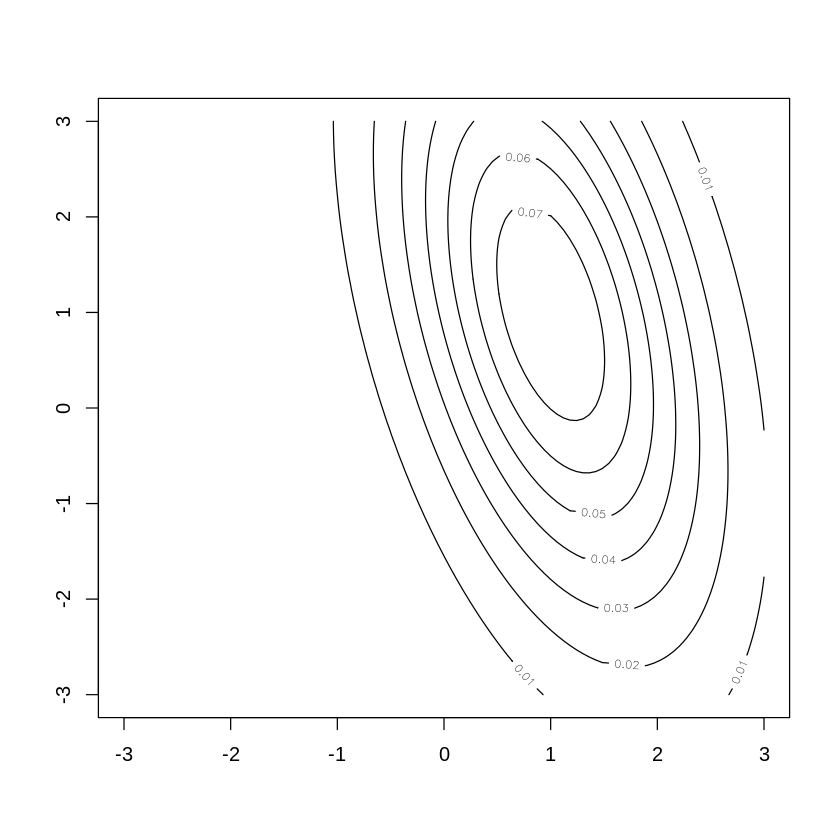

In [94]:
# exemples - cours FLD

## Exemple 1 - mvtnorm
install.packages("mvtnorm")
library(mvtnorm)
x.points <- seq(-3,3,length.out=100)
y.points <- x.points
z <- matrix(0,nrow=100,ncol=100)
mu <- c(1,1)
sigma <- matrix(c(1,-1,-1,5),nrow=2)
for (i in 1:100) {
  for (j in 1:100) {
    z[i,j] <- dmvnorm(c(x.points[i],y.points[j]),
                      mean=mu,sigma=sigma)
  }
}
contour(x.points,y.points,z)

## ***Génération de données (MixSim) :***

In [95]:
## Exemple 2 - MixSim
install.packages("MASS")
install.packages("MixSim")
library("MixSim")
library("MASS")

# Création de jeux de données avec MixSim
# jeu 1
jeu1.Q <- MixSim(MaxOmega = 0.0, BarOmega = 0.0, K = 2, p = 2, sph = TRUE)
jeu1 <- simdataset(n = 500, Pi = jeu1.Q$Pi, Mu = jeu1.Q$Mu, S = jeu1.Q$S)

#jeu 2
jeu2.Q <- MixSim(MaxOmega = 0.10, BarOmega = 0.05, K = 3, p = 2, sph = TRUE)
jeu2 <- simdataset(n = 500, Pi = jeu2.Q$Pi, Mu = jeu2.Q$Mu, S = jeu2.Q$S)

#jeu 3
jeu3.Q <- MixSim(MaxOmega = 0.10, BarOmega = 0.05, K = 3, p = 2, sph = FALSE)
jeu3 <- simdataset(n = 500, Pi = jeu3.Q$Pi, Mu = jeu3.Q$Mu, S = jeu3.Q$S)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



## **Représentation de données :**

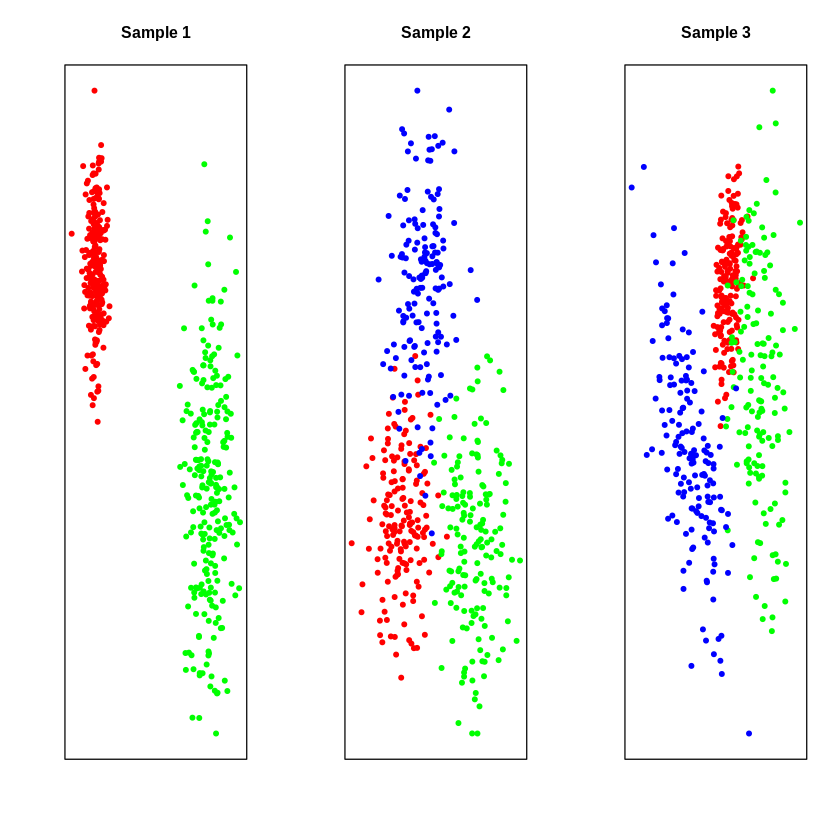

In [96]:
# Représentation graphique 
my_plot = function(jeu, predicts, title){
  plot(jeu$X, col = colors[predicts], pch = 19, cex = 0.8,
       xlab = "", ylab = "", axes = F, main = title)
  box()
}

colors <- c("red", "green", "blue")
par(mfrow=c(1,3))
my_plot(jeu1,jeu1$id,"Sample 1")
my_plot(jeu2,jeu2$id,"Sample 2")
my_plot(jeu3,jeu3$id,"Sample 3")

# **Partie 2 :**

## **Implémentation de la fonction gi**

In [97]:
gi <- function(x,mean,covariance,P,i) {
  return(-1 %*%(t((x-mean[i,]))%*%solve(covariance[[i]])%*%(x-mean[i,]))%*%0.5  + log(P[[i]]) - 0.5*log(det(covariance[[i]])))
}

## **Dataset 1 :**

In [98]:
mean = jeu1.Q$Mu
#-------------------
id = jeu1$id
index <- list()
ind = id[1]
for (i in (1:length(id)))
  {
    if(id[i] != ind)
      {index <- append(index,i)
       ind = id[i]
      }
  }
#--------------------
S = jeu1.Q$S
cov_1 <- matrix(S[1:4], nrow = 2, ncol = 2)
cov_2 <- matrix(S[5:8], nrow = 2, ncol = 2)
covariance = list(cov_1,cov_2)
#--------------------
P = list(270/500,(500-270)/500)

In [99]:
X = jeu1$X
list_label = list()
k = 2
max = 0
label = 1
 for (j in (1:500))
 {
   for (i in (1:k))
   {
     val = gi(X[j,],mean,covariance,P,i)[1]
     if(i == 1)
     {
       max <- val
       label <- i
     }
     else
     {

       if(val > max)
       {
         max <- val
         label = i
       }
     }
   }
   list_label <- append(list_label,label)
 }

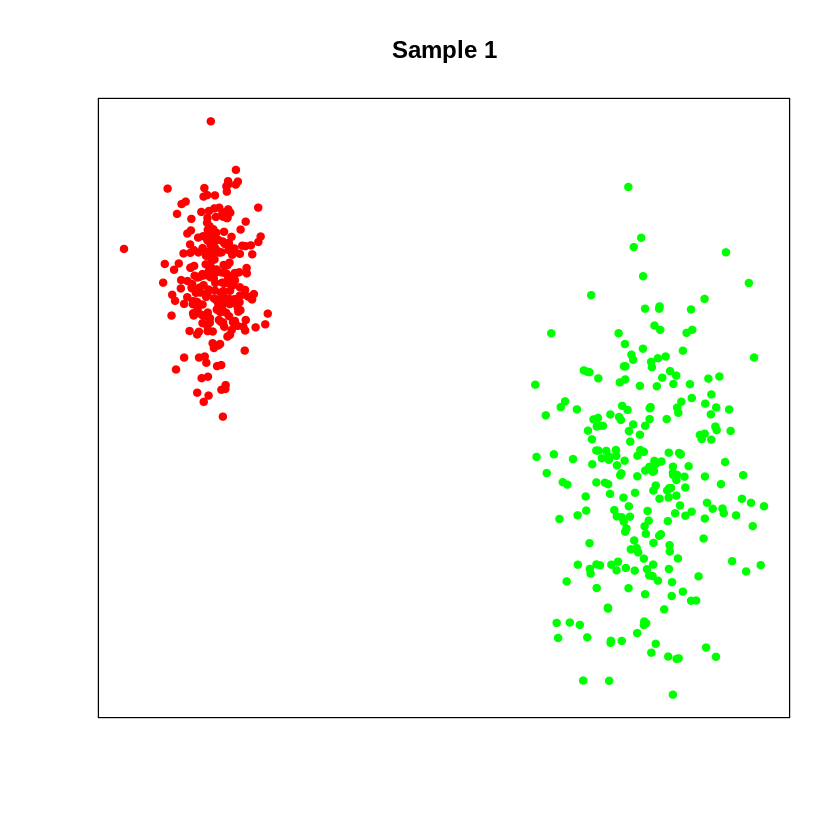

In [100]:
my_plot(jeu1,as.integer(list_label),"Sample 1")

In [101]:
acc = (sum(list_label== jeu1$id, na.rm=T) + sum(is.na(list_label) & is.na(jeu1$id))) / length(list_label)
paste("Dataset 1 prediction accuracy is :",acc)

[1] "Dataset 1 prediction accuracy is : 1"

En regardant le nuage des points on peut voir clarement que les deux classes sont bien séparées d'oû l'accuracy élvée (pas de chevauchement entre les points dans la représentation graphique ) 

## **Dataset 2 :**

In [102]:
mean = jeu2.Q$Mu
#-------------------
id = jeu2$id
index <- list()
ind = id[1]
for (i in (1:length(id)))
  {
    if(id[i] != ind)
      {index <- append(index,i)
       ind = id[i]
      }
  }
#--------------------
S = jeu2.Q$S
cov_1 <- matrix(S[1:4], nrow = 2, ncol = 2)
cov_2 <- matrix(S[5:8], nrow = 2, ncol = 2)
cov_3 <- matrix(S[9:12], nrow = 2, ncol = 2)

covariance = list(cov_1,cov_2,cov_3)
#--------------------
P = list(171/500,(317-172)/500,(500-316)/500)

In [103]:
X = jeu2$X
list_label = list()
k = 3
max = 0
label = 1
 for (j in (1:500))
 {
   for (i in (1:k))
   {
     val = gi(X[j,],mean,covariance,P,i)[1]
     if(i == 1)
     {
       max <- val
       label <- i
     }
     else
     {

       if(val > max)
       {
         max <- val
         label = i
       }
     }
   }
   list_label <- append(list_label,label)
 }

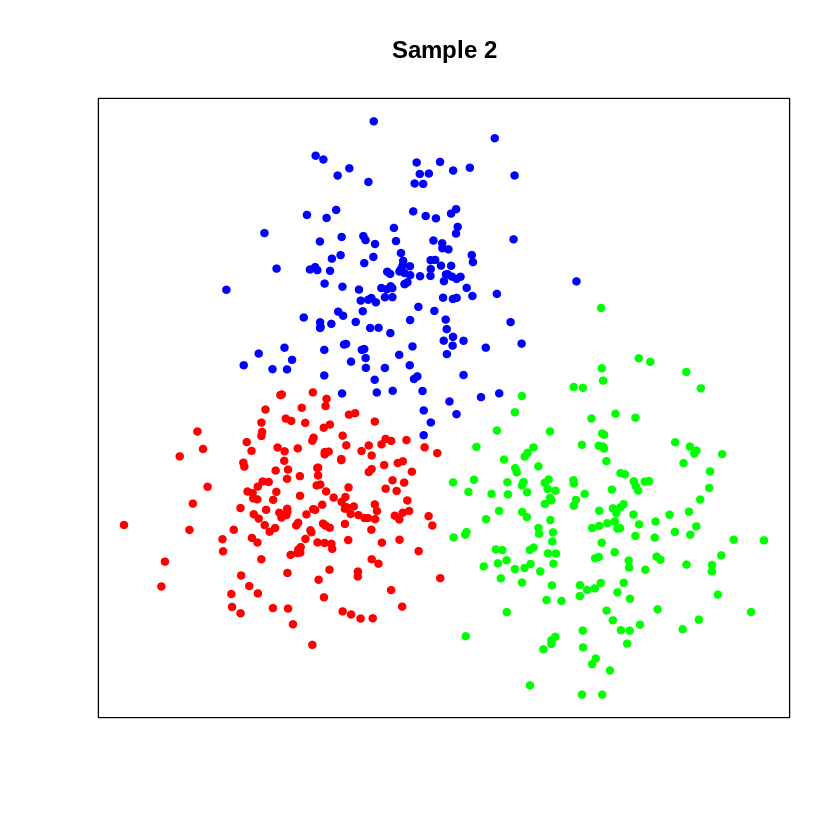

In [104]:
my_plot(jeu2,as.integer(list_label),"Sample 2")

In [105]:
acc = (sum(list_label== jeu2$id, na.rm=T) + sum(is.na(list_label) & is.na(jeu2$id))) / length(list_label)
paste("Dataset 2 prediction accuracy is :",acc)

[1] "Dataset 2 prediction accuracy is : 0.952"

Pour le deuxième Dataset les classes sont un peu chevauchées ce qui justifie la baisse de l'accuracy par rapport au premier dataset 
Quand même l'accuracy reste elvée vu que notre classifieur est quadratique et nos classes sont sphériques

## **Dataset 3 :**

In [106]:
mean = jeu3.Q$Mu
#-------------------
id = jeu3$id
index <- list()
ind = id[1]
for (i in (1:length(id)))
  {
    if(id[i] != ind)
      {index <- append(index,i)
       ind = id[i]
      }
  }
#--------------------
S = jeu3.Q$S
cov_1 <- matrix(S[1:4], nrow = 2, ncol = 2)
cov_2 <- matrix(S[5:8], nrow = 2, ncol = 2)
cov_3 <- matrix(S[9:12], nrow = 2, ncol = 2)

covariance = list(cov_1,cov_2,cov_3)
#--------------------
P = list(165/500,(348-166)/500,(500-347)/500)

In [107]:
X = jeu3$X
list_label = list()
k = 3
max = 0
label = 1
 for (j in (1:500))
 {
   for (i in (1:k))
   {
     val = gi(X[j,],mean,covariance,P,i)[1]
     if(i == 1)
     {
       max <- val
       label <- i
     }
     else
     {

       if(val > max)
       {
         max <- val
         label = i
       }
     }
   }
   list_label <- append(list_label,label)
 }

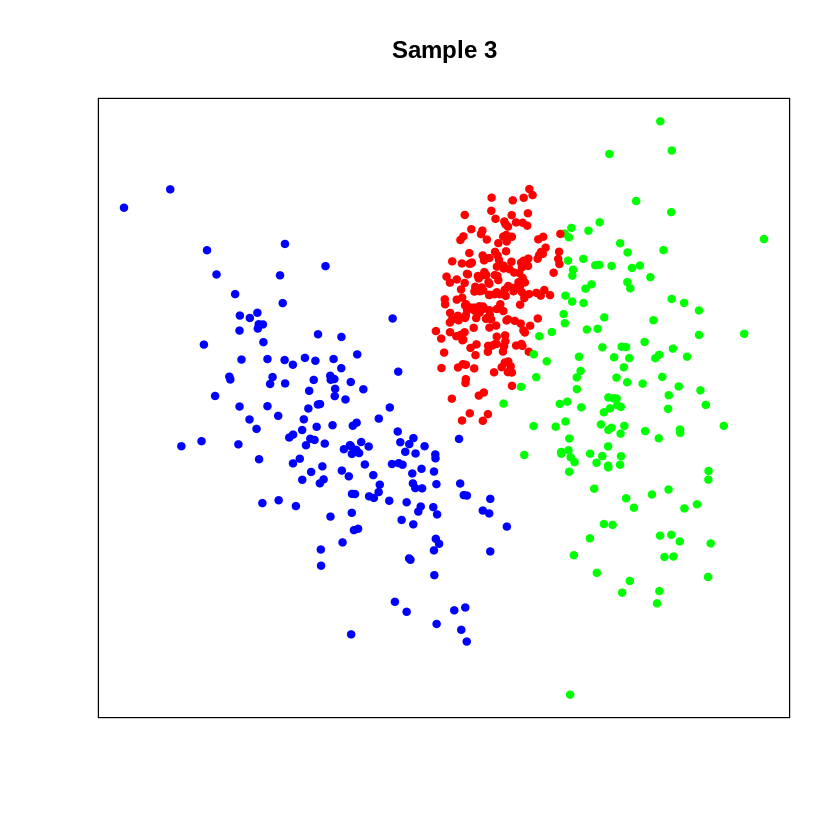

In [108]:
my_plot(jeu3,as.integer(list_label),"Sample 3")

In [109]:
acc = (sum(list_label== jeu2$id, na.rm=T) + sum(is.na(list_label) & is.na(jeu2$id))) / length(list_label)
paste("Dataset 3 prediction accuracy is :",acc)

[1] "Dataset 3 prediction accuracy is : 0.912"

L'accuracy du Dataset 3 est la plus basse entre les accuracy des 3
il y a du chevauchement entre les classes

avec un classifieur quadratique qui signifie "boundaries de désicion" quadratique(elipse,...) c'est pas évident de séparer des classes non sphériques